# Implementing MLP with Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
print(f'Tensorflow: {tf.__version__}')
print(f'Keras: {keras.__version__}')

Tensorflow: 2.10.0
Keras: 2.10.0


## Retrieve Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [2]:
import matplotlib.pyplot as plt

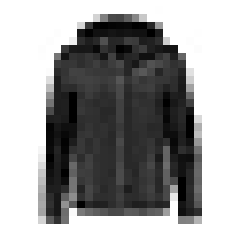

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden_1 = model.layers[1]

In [14]:
hidden_1.name

'dense'

In [15]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [16]:
model.get_layer("dense") is hidden_1

True

In [17]:
weights, biases = hidden_1.get_weights()

In [18]:
weights

array([[-0.01134795, -0.00675106, -0.05229093, ..., -0.00418186,
        -0.0598775 ,  0.07106587],
       [-0.06409153,  0.06776159, -0.02407165, ...,  0.04460551,
         0.01744158,  0.05997975],
       [ 0.03930804,  0.04812739, -0.05321988, ...,  0.01309039,
        -0.06734356, -0.04260853],
       ...,
       [ 0.02149198, -0.05270053, -0.03208856, ..., -0.07283658,
         0.0736753 , -0.00592466],
       [-0.01340818,  0.05039493,  0.01156279, ..., -0.02094003,
        -0.01815743, -0.04891075],
       [-0.0362381 ,  0.0325959 ,  0.00557808, ..., -0.05187834,
        -0.01060393, -0.06449775]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",#keras.optimizers.SGD(lr=0.01)
    metrics=["accuracy"]
)

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7263 - accuracy: 0.7650 - val_loss: 0.5224 - val_accuracy: 0.8214
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4863 - accuracy: 0.8310 - val_loss: 0.4471 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4407 - accuracy: 0.8459 - val_loss: 0.4128 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4137 - accuracy: 0.8548 - val_loss: 0.4182 - val_accuracy: 0.8520
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3927 - accuracy: 0.8610 - val_loss: 0.3862 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8671 - val_loss: 0.3720 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3659 - accuracy: 0.8703 - val_loss: 0.3684 - val_accuracy:

In [3]:
import pandas as pd

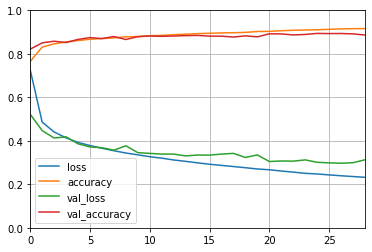

In [25]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df)
plt.grid(True)
plt.gca().set_ylim(0, 1)# set vertical range to [0-1]
plt.gca().set_xlim(0, 28)
plt.legend(history_df.keys())
plt.show()

## Creating Regression MLP

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.4200 - val_loss: 1.0181
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7798 - val_loss: 0.7563
Epoch 3/20
363/363 [==============================] - 0s 876us/step - loss: 0.7037 - val_loss: 0.7841
Epoch 4/20
363/363 [==============================] - 0s 873us/step - loss: 0.6712 - val_loss: 0.6663
Epoch 5/20
363/363 [==============================] - 0s 994us/step - loss: 0.6441 - val_loss: 0.6499
Epoch 6/20
363/363 [==============================] - 0s 892us/step - loss: 0.6179 - val_loss: 0.6545
Epoch 7/20
363/363 [==============================] - 0s 928us/step - loss: 0.5921 - val_loss: 0.6719
Epoch 8/20
363/363 [==============================] - 0s 981us/step - loss: 0.5657 - val_loss: 0.5655
Epoch 9/20
363/363 [==============================] - 0s 873us/step - loss: 0.5399 - val_loss: 0.5907
Epoch 10/20
363/363 [==============================] - 0s 895us/step - loss: 0.5188 - 

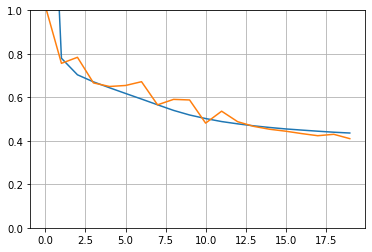

In [7]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
y_pred

array([[0.70348686],
       [1.5545306 ],
       [3.2732475 ]], dtype=float32)

## Functional API

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

In [12]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2820 - val_loss: 0.8227
Epoch 2/20
363/363 [==============================] - 0s 859us/step - loss: 0.7469 - val_loss: 1.0210
Epoch 3/20
363/363 [==============================] - 0s 917us/step - loss: 0.6876 - val_loss: 0.6360
Epoch 4/20
363/363 [==============================] - 0s 909us/step - loss: 0.6368 - val_loss: 0.5758
Epoch 5/20
363/363 [==============================] - 0s 859us/step - loss: 0.6031 - val_loss: 0.5920
Epoch 6/20
363/363 [==============================] - 0s 895us/step - loss: 0.5713 - val_loss: 0.5823
Epoch 7/20
363/363 [==============================] - 0s 925us/step - loss: 0.5507 - val_loss: 0.5520
Epoch 8/20
363/363 [==============================] - 0s 856us/step - loss: 0.5319 - val_loss: 0.5725
Epoch 9/20
363/363 [==============================] - 0s 903us/step - loss: 0.5122 - val_loss: 0.4879
Epoch 10/20
363/363 [==============================] - 0s 912us/step - loss: 0.4978 

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [13]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                            

In [15]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit([X_train_A, X_train_B], y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8804 - val_loss: 1.3921
Epoch 2/20
363/363 [==============================] - 0s 956us/step - loss: 0.7817 - val_loss: 0.8641
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6972 - val_loss: 0.6857
Epoch 4/20
363/363 [==============================] - 0s 934us/step - loss: 0.6581 - val_loss: 0.6298
Epoch 5/20
363/363 [==============================] - 0s 953us/step - loss: 0.6310 - val_loss: 0.5952
Epoch 6/20
363/363 [==============================] - 0s 986us/step - loss: 0.6088 - val_loss: 0.5740
Epoch 7/20
363/363 [==============================] - 0s 923us/step - loss: 0.5888 - val_loss: 0.5560
Epoch 8/20
363/363 [==============================] - 0s 981us/step - loss: 0.5709 - val_loss: 0.5413
Epoch 9/20
363/363 [==============================] - 0s 986us/step - loss: 0.5543 - val_loss: 0.5259
Epoch 10/20
363/363 [==============================] - 0s 928us/step - loss: 0.5394 - 

Adding an auxiliary output for regularization

In [16]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [17]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                            

In [18]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [19]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.5552 - main_output_loss: 2.2043 - aux_output_loss: 5.7129 - val_loss: 1.5826 - val_main_output_loss: 1.2566 - val_aux_output_loss: 4.5164
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0489 - main_output_loss: 0.7486 - aux_output_loss: 3.7516 - val_loss: 1.0307 - val_main_output_loss: 0.7354 - val_aux_output_loss: 3.6885
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8453 - main_output_loss: 0.6560 - aux_output_loss: 2.5497 - val_loss: 0.8833 - val_main_output_loss: 0.5964 - val_aux_output_loss: 3.4652
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7402 - main_output_loss: 0.6090 - aux_output_loss: 1.9212 - val_loss: 0.8435 - val_main_output_loss: 0.5629 - val_aux_output_loss: 3.3690
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6788 - main_output_loss: 0.5757 - aux_output_loss: 1.6073 - val_loss

In [20]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 45ms/step


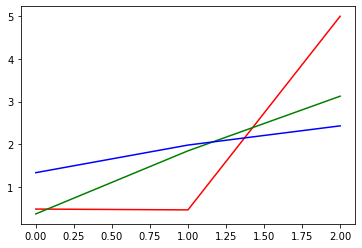

In [21]:
plt.plot(y_test[:3], 'r-')
plt.plot(y_pred_main, 'g-')
plt.plot(y_pred_aux, 'b-')
plt.show()

## Subclassing API

In [36]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [38]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.1962 - output_1_loss: 1.9515 - output_2_loss: 4.3988 - val_loss: 2.2230 - val_output_1_loss: 0.8423 - val_output_2_loss: 14.6490
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9996 - output_1_loss: 0.7699 - output_2_loss: 3.0669 - val_loss: 2.0814 - val_output_1_loss: 0.6670 - val_output_2_loss: 14.8104
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8448 - output_1_loss: 0.6829 - output_2_loss: 2.3020 - val_loss: 1.9018 - val_output_1_loss: 0.6166 - val_output_2_loss: 13.4689
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7645 - output_1_loss: 0.6400 - output_2_loss: 1.8855 - val_loss: 1.6730 - val_output_1_loss: 0.5994 - val_output_2_loss: 11.3355
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7082 - output_1_loss: 0.6046 - output_2_loss: 1.6405 - val_loss: 1.4433 - val_output_1_loss: 0.5502 - va

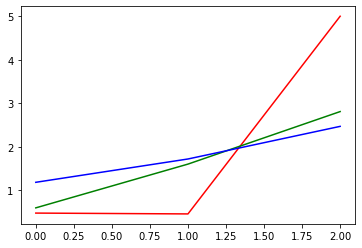

In [39]:
plt.plot(y_test[:3], 'r-')
plt.plot(y_pred_main, 'g-')
plt.plot(y_pred_aux, 'b-')
plt.show()

## Saving and Restoring

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [42]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.0285 - val_loss: 0.8210
Epoch 2/10
363/363 [==============================] - 0s 906us/step - loss: 0.7221 - val_loss: 0.8464
Epoch 3/10
363/363 [==============================] - 0s 881us/step - loss: 0.6360 - val_loss: 0.8058
Epoch 4/10
363/363 [==============================] - 0s 892us/step - loss: 0.5824 - val_loss: 0.6228
Epoch 5/10
363/363 [==============================] - 0s 887us/step - loss: 0.5414 - val_loss: 0.5322
Epoch 6/10
363/363 [==============================] - 0s 884us/step - loss: 0.5081 - val_loss: 0.5138
Epoch 7/10
363/363 [==============================] - 0s 890us/step - loss: 0.4834 - val_loss: 0.4955
Epoch 8/10
363/363 [==============================] - 0s 953us/step - loss: 0.4643 - val_loss: 0.4451
Epoch 9/10
363/363 [==============================] - 0s 928us/step - loss: 0.4492 - val_loss: 0.4301
Epoch 10/10
162/162 [==============================] - 0s 640us/step - loss: 0.4284


In [43]:
model.save("my_keras_model.h5")

In [44]:
model = keras.models.load_model("my_keras_model.h5")

In [45]:
model.predict(X_new)

1/1 [==============================] - 0s 37ms/step


array([[0.78245854],
       [1.6409918 ],
       [3.4381618 ]], dtype=float32)

### Saving and Loading Weights

In [46]:
model.save_weights("my_keras_weights.ckpt")

In [47]:
model.load_weights("my_keras_weights.ckpt")

## Using Callbacks during Training

In [48]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1),
])

In [50]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10


c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


363/363 [==============================] - 1s 2ms/step - loss: 1.5206 - val_loss: 1.3187
Epoch 2/10
363/363 [==============================] - 0s 975us/step - loss: 0.6574 - val_loss: 0.7281
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5897 - val_loss: 0.6032
Epoch 4/10
363/363 [==============================] - 0s 989us/step - loss: 0.5430 - val_loss: 0.5643
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5091 - val_loss: 0.4963
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4816 - val_loss: 0.4781
Epoch 7/10
363/363 [==============================] - 0s 948us/step - loss: 0.4621 - val_loss: 0.4541
Epoch 8/10
363/363 [==============================] - 0s 983us/step - loss: 0.4467 - val_loss: 0.4382
Epoch 9/10
363/363 [==============================] - 0s 961us/step - loss: 0.4348 - val_loss: 0.4373
Epoch 10/10
162/162 [==============================] - 0s 621us/step - loss: 0.4193


In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4183 - val_loss: 0.4308
Epoch 2/100
363/363 [==============================] - 0s 881us/step - loss: 0.4121 - val_loss: 0.4373
Epoch 3/100
363/363 [==============================] - 0s 906us/step - loss: 0.4073 - val_loss: 0.4305
Epoch 4/100
363/363 [==============================] - 0s 901us/step - loss: 0.4027 - val_loss: 0.4494
Epoch 5/100
363/363 [==============================] - 0s 892us/step - loss: 0.3993 - val_loss: 0.4344
Epoch 6/100
363/363 [==============================] - 0s 884us/step - loss: 0.3956 - val_loss: 0.4377
Epoch 7/100
363/363 [==============================] - 0s 878us/step - loss: 0.3930 - val_loss: 0.4394
Epoch 8/100
363/363 [==============================] - 0s 903us/step - loss: 0.3904 - val_loss: 0.4248
Epoch 9/100
363/363 [==============================] - 0s 876us/step - loss: 0.3879 - val_loss: 0.4305
Epoch 10/100
363/363 [==============================] - 0s 873us/step - los

In [57]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [60]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

333/363 [==========================>...] - ETA: 0s - loss: 0.3540
val/train: 1.18
363/363 [==============================] - 1s 2ms/step - loss: 0.3558 - val_loss: 0.4200


## Tensorboard

In [62]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [63]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_09_25-16_05_19'

In [64]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [67]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.6495 - val_loss: 0.9974
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7414 - val_loss: 0.7483
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6745 - val_loss: 0.6406
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6233 - val_loss: 0.5848
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5802 - val_loss: 0.5500
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5414 - val_loss: 0.5026
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5094 - val_loss: 0.4768
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4840 - val_loss: 0.4649
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4637 - val_loss: 0.4358
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4488 - val_loss: 0.4227

In [68]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [69]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_09_25-16_11_21'

In [70]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [72]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.5717 - val_loss: 12.1825
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7639 - val_loss: 1.4807
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4006 - val_loss: 0.5433
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3614 - val_loss: 0.3223
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3489 - val_loss: 0.7663
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3472 - val_loss: 0.3439
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3390 - val_loss: 0.3072
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3268 - val_loss: 0.3068
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3231 - val_loss: 0.3203
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3226 - val_loss: 0.304